In [1]:
import pandas as pd
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('gas_turbines.csv')

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.shape

(15039, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


<Axes: >

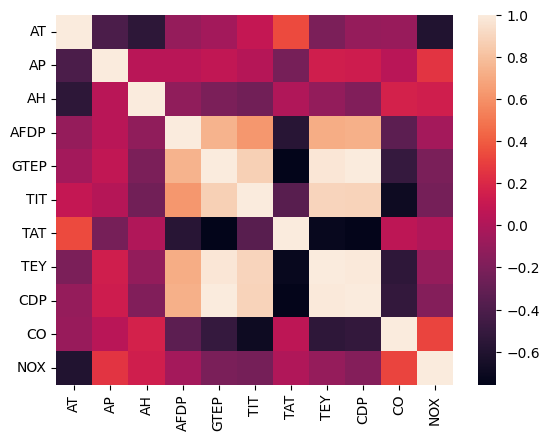

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(df.corr())

<Axes: >

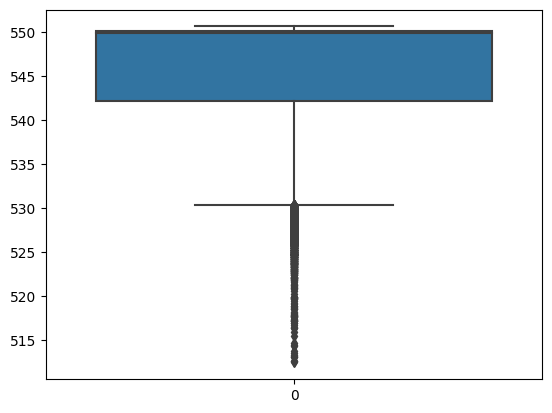

In [9]:
sns.boxplot(df.TAT)

<Axes: >

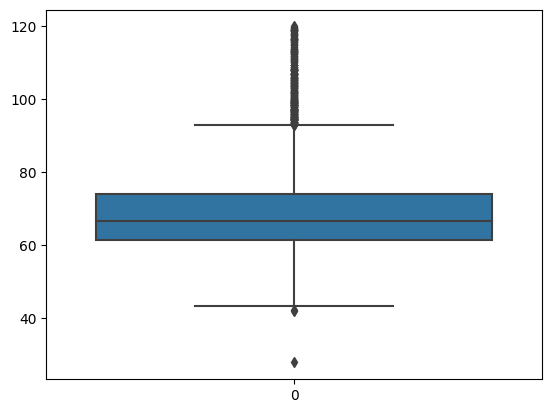

In [10]:
sns.boxplot(df.NOX)

<ipython-input-11-5383029b97e1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TEY)


<Axes: xlabel='TEY', ylabel='Density'>

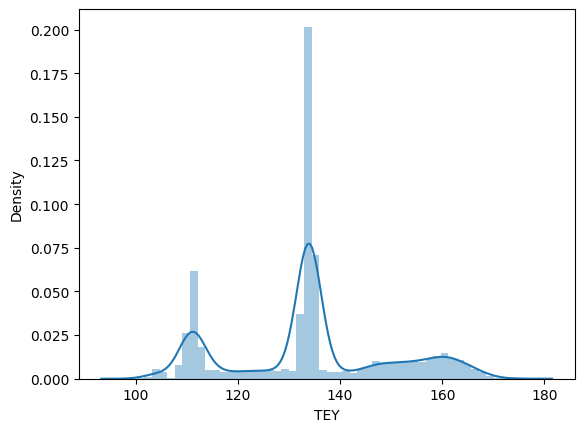

In [11]:
sns.distplot(df.TEY)

In [12]:
x = df.drop('TEY',axis=1)
X = x.iloc[:,0:]
X.shape

(15039, 10)

In [13]:
y = df['TEY']
y.shape
Y = y.values.reshape(-1,1)

In [14]:
# Standarization 
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)


In [15]:
# Importing the necessary packages
from sklearn.model_selection import  train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor


In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
x_train.shape,x_test.shape

((12031, 10), (3008, 10))

MOdel Building

In [17]:
from keras.optimizers.legacy import adam
model = Sequential()
model.add(Dense(16,input_dim = 10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(12,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.0))
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
model.compile(loss='mse',optimizer = 'adam',metrics=['mae','mse'])

In [18]:
model.fit(x_train,y_train,batch_size=100,epochs=40)
y_pred = model.predict(x_train)

Epoch 1/40
121/121 [==============================] - 3s 4ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 2/40
121/121 [==============================] - 1s 4ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 3/40
121/121 [==============================] - 0s 4ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 4/40
121/121 [==============================] - 0s 3ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 5/40
121/121 [==============================] - 0s 3ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 6/40
121/121 [==============================] - 0s 4ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 7/40
121/121 [==============================] - 0s 4ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 8/40
121/121 [==============================] - 1s 4ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 9/40
121/121 [==============================] - 1s 6ms/step - loss: 0.9996 - mae: 0.7043 - mse: 0.9996
Epoch 10/40
121/121

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [20]:
y_pred_test= model.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [21]:
mean_squared_error(y_test,y_pred_test)

1.0017966132562022